<a href="https://colab.research.google.com/github/RationalRhythms/Creativeminds/blob/main/DHCD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [73]:
!wget https://github.com/Prasanna1991/DHCD_Dataset/archive/refs/heads/master.zip
!unzip -q master.zip -d /content/DHCD

--2025-06-08 09:43:57--  https://github.com/Prasanna1991/DHCD_Dataset/archive/refs/heads/master.zip
Resolving github.com (github.com)... 20.27.177.113
Connecting to github.com (github.com)|20.27.177.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://codeload.github.com/Prasanna1991/DHCD_Dataset/zip/refs/heads/master [following]
--2025-06-08 09:43:57--  https://codeload.github.com/Prasanna1991/DHCD_Dataset/zip/refs/heads/master
Resolving codeload.github.com (codeload.github.com)... 20.27.177.114
Connecting to codeload.github.com (codeload.github.com)|20.27.177.114|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/zip]
Saving to: ‘master.zip.2’

master.zip.2            [         <=>        ]  35.56M  20.9MB/s    in 1.7s    

2025-06-08 09:44:03 (20.9 MB/s) - ‘master.zip.2’ saved [37290492]

replace /content/DHCD/DHCD_Dataset-master/README.md? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
replace /content/D

In [74]:
import os

dataset_dir = '/content/DHCD/DHCD_Dataset-master/dataset'
print("Contents of dataset directory:", os.listdir(dataset_dir))


Contents of dataset directory: ['dataset.npz']


In [75]:
import numpy as np

data = np.load('/content/DHCD/DHCD_Dataset-master/dataset/dataset.npz')
print(data.files)  # Display the keys in the .npz file


['arr_1', 'arr_0', 'arr_3', 'arr_2']


In [76]:
for key in data.files:
    print(f"{key} shape: {data[key].shape}")


arr_1 shape: (78200,)
arr_0 shape: (78200, 32, 32)
arr_3 shape: (13800,)
arr_2 shape: (13800, 32, 32)


In [77]:
X_train = data['arr_0']
y_train = data['arr_1']
X_test = data['arr_2']
y_test = data['arr_3']


X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

In [78]:
indices = np.arange(len(X_train))
np.random.shuffle(indices)

X_train = X_train[indices]
y_train = y_train[indices]

In [79]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

In [80]:


num_classes = len(np.unique(y_train))
print(f"Number of classes: {num_classes}")


Number of classes: 46


In [81]:
print(y_train.dtype)
print(np.min(y_train), np.max(y_train))  # should be between 0 and 45

int64
1 46


In [82]:
y_train = y_train - 1
y_test = y_test - 1


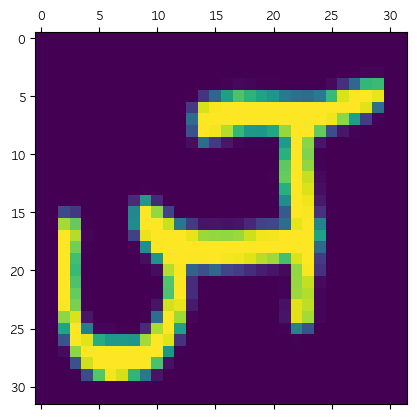

In [83]:
plt.matshow(X_test[1001])

In [107]:
model = keras.Sequential([
   keras.layers.Input(shape=(32, 32)),
    keras.layers.Flatten(),
    keras.layers.Dense(100, activation='leaky_relu'),
    keras.layers.Dense(60, activation='relu'),
    keras.layers.Dense(46, activation='softmax')
])

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])


model.fit(X_train,y_train, epochs=15)

Epoch 1/15
2444/2444 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.5540 - loss: 1.6773
Epoch 2/15
2444/2444 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8242 - loss: 0.6133
Epoch 3/15
2444/2444 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8723 - loss: 0.4380
Epoch 4/15
2444/2444 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.8937 - loss: 0.3562
Epoch 5/15
2444/2444 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9094 - loss: 0.3064
Epoch 6/15
2444/2444 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9193 - loss: 0.2707
Epoch 7/15
2444/2444 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9250 - loss: 0.2425
Epoch 8/15
2444/2444 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9362 - loss: 0.2114
Epoch 9/15
2444/2444 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9384 - loss: 0.1996
Epoch 10/15
2444/2444 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9429 - loss: 0.1830
Epoch 11/15
2444/2444 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9460 - loss: 0.1730
Epoch 12/15
2444/2444 ━━

In [108]:
model.evaluate(X_test,y_test)

432/432 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9016 - loss: 0.4331


[0.410705029964447, 0.9053623080253601]

In [86]:
y_predicted=model.predict(X_test)

432/432 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


In [87]:
y_predicted_labels=[np.argmax(i) for i in y_predicted]
y_predicted_labels[:10]

[np.int64(38),
 np.int64(38),
 np.int64(38),
 np.int64(38),
 np.int64(38),
 np.int64(38),
 np.int64(38),
 np.int64(38),
 np.int64(38),
 np.int64(38)]

In [88]:
devanagari_chars = [
    'क', 'ख', 'ग', 'घ', 'ङ', 'च', 'छ', 'ज', 'झ', 'ञ',
    'ट', 'ठ', 'ड', 'ढ', 'ण', 'त', 'थ', 'द', 'ध', 'न',
    'प', 'फ', 'ब', 'भ', 'म', 'य', 'र', 'ल', 'व', 'श',
    'ष', 'स', 'ह', 'क्ष', 'त्र', 'ज्ञ'
]


In [89]:
devanagari_digits = ['०', '१', '२', '३', '४', '५', '६', '७', '८', '९']

In [90]:
class_names = devanagari_chars + devanagari_digits


In [91]:
!apt-get install fonts-lohit-deva



Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-lohit-deva is already the newest version (2.95.4-4).
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.


In [92]:
!rm -rf ~/.cache/matplotlib

In [93]:
!fc-list | grep -i lohit


/usr/share/fonts/truetype/lohit-devanagari/Lohit-Devanagari.ttf: Lohit Devanagari:style=Regular


In [94]:
from matplotlib import font_manager

font_path = '/usr/share/fonts/truetype/lohit-devanagari/Lohit-Devanagari.ttf'
font_manager.fontManager.addfont(font_path)

print([f.name for f in font_manager.fontManager.ttflist if 'Lohit' in f.name or 'Devanagari' in f.name])

['Lohit Devanagari', 'Lohit Devanagari']


In [95]:
from matplotlib import rcParams

rcParams['font.family'] = 'Lohit Devanagari'

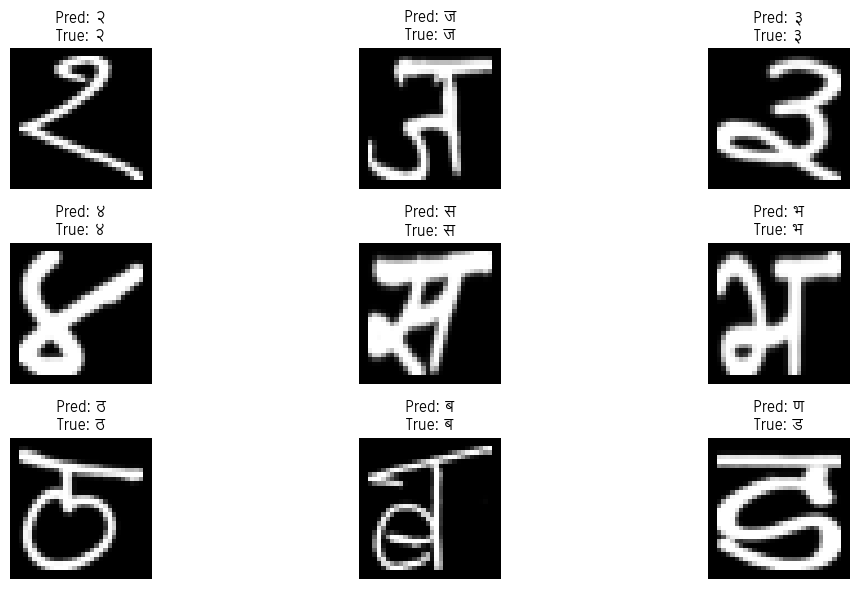

In [109]:

plt.figure(figsize=(12, 6))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    img = X_test[1000*i].squeeze()  # Ensure image is in grayscale
    plt.imshow(img, cmap='gray')

    pred = class_names[y_predicted_labels[i*1000]]
    true = class_names[y_test[i*1000]]


    plt.title(f"Pred: {pred}\nTrue: {true}", fontsize=12)
    plt.axis('off')

plt.tight_layout()
plt.show()